In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import pylab as py
import warnings
from sklearn import linear_model
from sqlalchemy import create_engine
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
warnings.filterwarnings(action="ignore")
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

insurance_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
houseprices_df = pd.read_sql_query('select * from houseprices',con=engine)

import warnings
warnings.filterwarnings(action="ignore")

In [4]:
houseprices_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [5]:
houseprices_df = pd.concat([houseprices_df,pd.get_dummies(houseprices_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
houseprices_df = pd.concat([houseprices_df,pd.get_dummies(houseprices_df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(houseprices_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(houseprices_df.street, prefix="street", drop_first=True).columns)

# Split your data into train and test sets.

In [6]:
# Y is the target variable
Y = houseprices_df['saleprice']
# X is the feature set
X = houseprices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf'] + dummy_column_names]

X = sm.add_constant(X)

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(train_Y, train_X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     383.1
Date:                Sat, 08 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:33:16   Log-Likelihood:                -13972.
No. Observations:                1168   AIC:                         2.797e+04
Df Residuals:                    1157   BIC:                         2.802e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.039e+05   2.06e+04     -5.037      0.000   -1.44e+05   -6.34e+04
overallqual  2.433e+04   1244.706     19.548      0.000    2.19e+04    2.68e+04
grlivarea      43.3745      2.745     15.800      0.000      37.988      48.760
garagecars   1.407e+04   3409.600      4.126      0.000    7379.047    2.08e+04
garagearea     17.5210     11.560      1.516      0.130      -5.161      40.203
totalbsmtsf    23.4504      3.183      7.368      0.000      17.206      29.695
mszoning_FV  1.933e+04    1.5e+04      1.289      0.198   -1.01e+04    4.88e+04
mszoning_RH  7305.5078   1.72e+04      0.426      0.670   -2.63e+04     4.1e+04
mszoning_RL  2.429e+04   1.39e+04      1.747      0.081   -2983.478    5.16e+04
mszoning_RM  2864.3070   1.41e+04      0.203      0.839   -2.48e+04    3.05e+04
street_Pave -8177.6681   1.74e+04     -0.470      0.639   -4.23e+04     2.6e+04
==============================================================================
Omnibus:                      355.774   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30190.746
Skew:                          -0.383   Prob(JB):                         0.00
Kurtosis:                      27.895   Cond. No.                     5.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
train_X.head()

,const,overallqual,grlivarea,garagecars,garagearea,totalbsmtsf,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave
151,1.000,5,969,2,440,969,0,0,1,0,1
262,1.000,8,2574,3,868,1482,0,0,1,0,1
1037,1.000,8,2263,2,905,1055,0,0,1,0,1
1183,1.000,5,1130,2,720,1120,0,0,1,0,1
933,1.000,7,1500,2,570,1500,0,0,1,0,1


# Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.

The R-squared and the adjusted R-squared of the model are 0.768 and 0.766 . Hence, Thus farthe R-squared states 23% of the variance in the target variable is unexplained by the model. AIC and BIC scores are 27970 and 28020.

# Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.

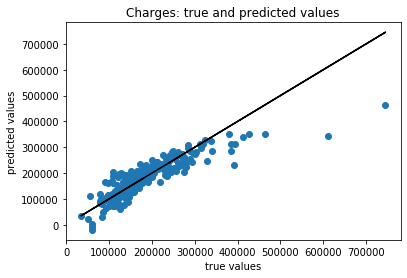

Mean absolute error of the prediction is: 25546.803828589207
Mean squared error of the prediction is: 1559083821.9730022
Root mean squared error of the prediction is: 39485.23549344745
Mean absolute percentage error of the prediction is: 15.551420347538109


In [8]:
# We are making predictions here
pred_Y = results.predict(test_X)

plt.scatter(test_Y, pred_Y)
plt.plot(test_Y, test_Y, color= "black")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(test_Y, pred_Y)))
print("Mean squared error of the prediction is: {}".format(mse(test_Y, pred_Y)))
print("Root mean squared error of the prediction is: {}".format(rmse(test_Y, pred_Y)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((test_Y - pred_Y) / test_Y)) * 100))

In [9]:
houseprices_df['totalsf'] = houseprices_df['totalbsmtsf'] + houseprices_df['firstflrsf'] + houseprices_df['secondflrsf']

houseprices_df['int_over_sf'] = houseprices_df['totalsf'] * houseprices_df['overallqual']

# Y is the target variable
Y = np.log1p(houseprices_df['saleprice'])
# X is the feature set
X = houseprices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalsf', 'int_over_sf'] + dummy_column_names]

X = sm.add_constant(X)

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(train_Y, train_X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     520.9
Date:                Sat, 08 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:33:16   Log-Likelihood:                 463.99
No. Observations:                1168   AIC:                            -904.0
Df Residuals:                    1156   BIC:                            -843.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.9162      0.102     97.518      0.000       9.717      10.116
overallqual     0.1893      0.009     20.123      0.000       0.171       0.208
grlivarea     9.58e-05   1.89e-05      5.074      0.000    5.88e-05       0.000
garagecars      0.0779      0.015      5.244      0.000       0.049       0.107
garagearea      0.0001   5.04e-05      2.132      0.033    8.57e-06       0.000
totalsf         0.0003   2.58e-05     11.139      0.000       0.000       0.000
int_over_sf -2.572e-05   3.02e-06     -8.526      0.000   -3.16e-05   -1.98e-05
mszoning_FV     0.3911      0.065      6.055      0.000       0.264       0.518
mszoning_RH     0.2650      0.074      3.593      0.000       0.120       0.410
mszoning_RL     0.3879      0.060      6.481      0.000       0.270       0.505
mszoning_RM     0.2155      0.061      3.556      0.000       0.097       0.334
street_Pave    -0.0556      0.075     -0.744      0.457      -0.202       0.091
==============================================================================
Omnibus:                      350.711   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2714.386
Skew:                          -1.167   Prob(JB):                         0.00
Kurtosis:                      10.094   Cond. No.                     5.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared is 0.832 and Adjusted R-squared is 0.831


This second model's R-squared and adjusted R-squared values are higher and AIC and BIC criterias are higher than the second model. perhaps the first model would be a better fit.

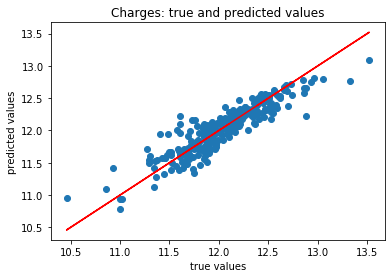

Mean absolute error of the prediction is: 0.12570372872853608
Mean squared error of the prediction is: 0.02919212187130334
Root mean squared error of the prediction is: 0.17085702172080414
Mean absolute percentage error of the prediction is: 1.0503577667818331


In [10]:
# We are making predictions here
pred_Y = results.predict(test_X)

plt.scatter(test_Y, pred_Y)
plt.plot(test_Y, test_Y, color= "red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(test_Y, pred_Y)))
print("Mean squared error of the prediction is: {}".format(mse(test_Y, pred_Y)))
print("Root mean squared error of the prediction is: {}".format(rmse(test_Y, pred_Y)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((test_Y - pred_Y) / test_Y)) * 100))

 For every metric, the second model has a better prediction performance in the test set.